# Backend Questions: Task-1

The purpose of this report is to answer questions in Task-1 of the 'Backend Test'.  Each of the questions will be addressed, individually.  The report is maintained as a jupyter notebook (.ipynb), created from a jupyterlab running in a docker container.  The Dockerfile image reference can be found, [here](https://github.com/jupyter/docker-stacks/tree/master/all-spark-notebook).  The report is exported to .pdf format, for quick viewing. 

The questions are:

1. Provide some high level statistics on the data set such as number of observations, and minimum and maximum values. Provide overall values (across the entire data set), values for each item, and values for each item and system combination.
2. Calculate the mean repair time for each item.
3. Calculate the failure rate (failures per hour) for each item and system combination.
4. Generate failure interarrival times (time between failures) for each item and system. What’s the expected value of the interarrival times? Does it correspond to the failure rate?
5. Create a histogram of the interarrival times for a single item. Can you draw any conclusion on the underlying distribution?

## Configuration

Read-in the file and perform cursory check for errors and missingness.  Try to maintain data immutability.

In [107]:
file <- '../Systecon_Practial_test_-_Back-end/Back-End_Task_Data/MaintenanceData/maintenance_data.csv'
df_raw <- read.csv(file, colClasses=c(
                                "character",
                                "character",
                                "character",
                                "numeric")
                  )
df_raw$Failure.Date <- as.Date(df_raw$Failure.observation, format="%m/%d/%Y")

In [108]:
print( dim(df_raw) )
head(df_raw, 3)

[1] 6253    5


Item,System,Failure.observation,Repair.time,Failure.Date
<chr>,<chr>,<chr>,<dbl>,<date>
Component 1,System 01,3/19/1990,23.44,1990-03-19
Component 1,System 01,8/16/1990,23.29,1990-08-16
Component 1,System 01,9/24/1990,20.98,1990-09-24


In [109]:
tail(df_raw, 3)

,Item,System,Failure.observation,Repair.time,Failure.Date
,<chr>,<chr>,<chr>,<dbl>,<date>
6251,Component 10,System 08,3/2/2015,6.63,2015-03-02
6252,Component 10,System 08,6/9/2015,11.14,2015-06-09
6253,Component 10,System 08,7/1/2015,9.63,2015-07-01


In [110]:
#check for missing values
print( dim(df_raw[df_raw$Item == "",]) )
print( dim(df_raw[df_raw$System== "",]) )

[1] 0 5
[1] 0 5


In [111]:
df_raw$ItemEd <- factor(df_raw$Item)
df_raw$SystemEd <- factor(df_raw$System)

In [112]:
summary(df_raw)

     Item              System          Failure.observation  Repair.time    
 Length:6253        Length:6253        Length:6253         Min.   :  5.01  
 Class :character   Class :character   Class :character    1st Qu.: 23.48  
 Mode  :character   Mode  :character   Mode  :character    Median : 53.87  
                                                           Mean   : 75.39  
                                                           3rd Qu.: 95.70  
                                                           Max.   :230.00  
                                                                           
  Failure.Date                 ItemEd          SystemEd   
 Min.   :1990-01-01   Component 6 :1888   System 05: 844  
 1st Qu.:1996-05-05   Component 9 :1316   System 03: 824  
 Median :2002-08-08   Component 1 :1052   System 02: 787  
 Mean   :2002-10-26   Component 2 : 845   System 06: 777  
 3rd Qu.:2009-06-04   Component 3 : 423   System 04: 766  
 Max.   :2015-12-29   Component 10: 34

In [113]:
#df_raw$SysItem <- paste(df_raw$System,'-', df_raw$Item,'')

In [114]:
df_raw <- df_raw[order(df_raw$Failure.Date),]

In [115]:
head(df_raw)

,Item,System,Failure.observation,Repair.time,Failure.Date,ItemEd,SystemEd
,<chr>,<chr>,<chr>,<dbl>,<date>,<fct>,<fct>
4496,Component 8,System 01,1/1/1990,93.77,1990-01-01,Component 8,System 01
3460,Component 6,System 05,1/2/1990,52.06,1990-01-02,Component 6,System 05
3966,Component 6,System 07,1/3/1990,50.24,1990-01-03,Component 6,System 07
3967,Component 6,System 07,1/4/1990,57.35,1990-01-04,Component 6,System 07
4594,Component 9,System 01,1/4/1990,182.96,1990-01-04,Component 9,System 01
4487,Component 7,System 08,1/5/1990,64.01,1990-01-05,Component 7,System 08


This concludes configuration and pre-processing

In [49]:
df <- df_raw

## Questions

1. Provide some high level statistics on the data set such as number of observations, and minimum and maximum values. Provide overall values (across the entire data set), values for each item, and values for each item and system combination.

In [50]:
#number of obs
print( dim(df)[1])

[1] 6253


In [51]:
#number of obs, no missing values
print( dim(df[is.na(df$ItemEd)==FALSE & is.na(df$SystemEd)==FALSE,])[1] )

[1] 6253


Data is fairly well-balanced across Systems, but the Items are quite different in their occurence.  We have a good number of samples, so we can use the median statistic (as opposed to mean), since it is resistent to outliers.

In [61]:
#counts for all levels of factor variables
print( summary(df$SystemEd) )
print( "---------------")
print( summary(df$ItemEd) )

System 01 System 02 System 03 System 04 System 05 System 06 System 07 System 08 
      757       787       824       766       844       777       742       756 
[1] "---------------"
 Component 1 Component 10  Component 2  Component 3  Component 4  Component 5 
        1052          344          845          423          180           29 
 Component 6  Component 7  Component 8  Component 9 
        1888           78           98         1316 


In [60]:
#repair times for combinations of System-Item
aggregate( Repair.time ~ ItemEd, df, FUN=median)

ItemEd,Repair.time
<fct>,<dbl>
Component 1,25.035
Component 10,10.040
Component 2,14.980
Component 3,54.690
Component 4,225.120
Component 5,119.980
Component 6,55.035
Component 7,65.415
Component 8,94.525


In [54]:
#item-system counts
xtabs(~SystemEd + ItemEd, df)

              SystemEd
ItemEd         System 01 System 02 System 03 System 04 System 05 System 06
  Component 1        121       157       130       124       149       107
  Component 10        43        54        31        59        46        42
  Component 2        103        91       114       110       118        96
  Component 3         62        46        50        46        59        55
  Component 4         20        24        24        24        24        24
  Component 5          2         4         5         4         6         4
  Component 6        218       220       255       237       241       265
  Component 7          8         9        10         7         7        11
  Component 8         15        15        18        14         9         8
  Component 9        165       167       187       141       185       165
              SystemEd
ItemEd         System 07 System 08
  Component 1        140       124
  Component 10        32        37
  Component 2         91

In [63]:
#repair times for combinations of System-Item
head( aggregate( Repair.time ~ SystemEd + ItemEd, df, FUN=median), 5)

SystemEd,ItemEd,Repair.time
<fct>,<fct>,<dbl>
System 01,Component 1,24.640
System 02,Component 1,24.930
System 03,Component 1,25.065
System 04,Component 1,25.580
System 05,Component 1,24.780


Standard deviation is fairly consistent across samples.  This is important to note when performing hypothesis testing.

In [68]:
#standard deviation of repair times for combinations of System-Item
head( aggregate( Repair.time ~ SystemEd + ItemEd, df, FUN=sd), 5)

SystemEd,ItemEd,Repair.time
<fct>,<fct>,<dbl>
System 01,Component 1,3.086979
System 02,Component 1,3.024297
System 03,Component 1,2.812243
System 04,Component 1,2.928497
System 05,Component 1,3.137809


2. Calculate the mean repair time for each item.

In [70]:
#repair times for combinations of System-Item, using mean
aggregate( Repair.time ~ ItemEd, df, FUN=mean)

ItemEd,Repair.time
<fct>,<dbl>
Component 1,25.057918
Component 10,9.921599
Component 2,14.979053
Component 3,54.857069
Component 4,225.181000
Component 5,120.034138
Component 6,55.024179
Component 7,65.309231
Component 8,94.957551


3. Calculate the failure rate (failures per hour) for each item and system combination.

Are the Systems run continuously over the same amount of time?  The notes do not tell us, but we may be able to assume this from the following difference between date of first and last failure.

In [145]:
library(dplyr)
tbl <- df %>% 
    group_by(factor(SystemEd)) %>%
    dplyr::mutate(
        first = dplyr::first(Failure.Date),
        last = dplyr::last(Failure.Date),
        time_diff = difftime(last, first, units = "hours")
    )

In [146]:
unique(tbl[c('System','first','last','time_diff')])

System,first,last,time_diff
<chr>,<date>,<date>,<drtn>
System 01,1990-03-19,2012-08-14,196416 hours
System 02,1990-04-19,2015-01-27,217176 hours
System 03,1990-01-19,2015-11-06,226128 hours
System 04,1990-05-02,2015-12-20,224712 hours
System 05,1990-05-07,2015-03-23,218064 hours
System 06,1990-03-29,2012-12-11,199032 hours
System 07,1990-11-25,2015-10-17,218208 hours
System 08,1990-07-25,2015-07-01,218568 hours


We will get the total hours by subtracting the first date from the last.

In [147]:
first <- as.Date('1990-01-01')
last <- as.Date('2015-12-29')
total_hours_run <- difftime(last, first, units='hours')

In [148]:
df_fail <-  xtabs( ~ SystemEd + ItemEd, df)

In [149]:
#Failures/hour for each combination
round( df_fail / as.numeric(total_hours_run), 6)

           ItemEd
SystemEd    Component 1 Component 10 Component 2 Component 3 Component 4
  System 01    0.000531     0.000189    0.000452    0.000272    0.000088
  System 02    0.000689     0.000237    0.000399    0.000202    0.000105
  System 03    0.000571     0.000136    0.000500    0.000219    0.000105
  System 04    0.000544     0.000259    0.000483    0.000202    0.000105
  System 05    0.000654     0.000202    0.000518    0.000259    0.000105
  System 06    0.000470     0.000184    0.000421    0.000241    0.000105
  System 07    0.000614     0.000140    0.000399    0.000198    0.000070
  System 08    0.000544     0.000162    0.000535    0.000263    0.000105
           ItemEd
SystemEd    Component 5 Component 6 Component 7 Component 8 Component 9
  System 01    0.000009    0.000957    0.000035    0.000066    0.000724
  System 02    0.000018    0.000966    0.000040    0.000066    0.000733
  System 03    0.000022    0.001119    0.000044    0.000079    0.000821
  System 04    0.00

4. Generate failure interarrival times (time between failures) for each item and system. What’s the expected value of the interarrival times? Does it correspond to the failure rate?

If the expected value of the distribution of interarrival times is lambda, then the inverse of lambda is the failure rate.

In [170]:
df_between <- df %>%
  group_by(SystemEd, ItemEd) %>%
  mutate(Time.Between = Failure.Date - lag(Failure.Date, n = 1, default = first(Failure.Date)),
         Hours.Between = as.numeric(Time.Between, units="hours"),
         Mean.Hours.Btn = mean(Hours.Between),
         Std.Hours.Btn = sd(Hours.Between)
        )

In [171]:
df_btn_uniq <- unique(df_between[c('SystemEd','ItemEd','Mean.Hours.Btn')])

In [172]:
df_btn_uniq$Inverse <- round(1/df_btn_uniq$Mean.Hours.Btn, 6)
head(df_btn_uniq, 5)

SystemEd,ItemEd,Mean.Hours.Btn,Inverse
<fct>,<fct>,<dbl>,<dbl>
System 01,Component 1,1819.240,0.000550
System 02,Component 1,1418.752,0.000705
System 03,Component 1,1717.662,0.000582
System 04,Component 1,1813.742,0.000551
System 05,Component 1,1507.812,0.000663


5. Create a histogram of the interarrival times for a single item. Can you draw any conclusion on the underlying distribution?

This is a distribution of the time between events in a poisson process, which is best-characterized by the Exponential distribution.

In [173]:
head(df_between)

Item,System,Failure.observation,Repair.time,Failure.Date,ItemEd,SystemEd,Time.Between,Hours.Between,Mean.Hours.Btn,Std.Hours.Btn
<chr>,<chr>,<chr>,<dbl>,<date>,<fct>,<fct>,<drtn>,<dbl>,<dbl>,<dbl>
Component 1,System 01,3/19/1990,23.44,1990-03-19,Component 1,System 01,0 days,0,1819.24,1667.386
Component 1,System 01,8/16/1990,23.29,1990-08-16,Component 1,System 01,150 days,3600,1819.24,1667.386
Component 1,System 01,9/24/1990,20.98,1990-09-24,Component 1,System 01,39 days,936,1819.24,1667.386
Component 1,System 01,12/6/1990,21.01,1990-12-06,Component 1,System 01,73 days,1752,1819.24,1667.386
Component 1,System 01,1/20/1991,29.92,1991-01-20,Component 1,System 01,45 days,1080,1819.24,1667.386
Component 1,System 01,3/30/1991,26.32,1991-03-30,Component 1,System 01,69 days,1656,1819.24,1667.386


In [179]:
df_between$SysItem = factor(paste(df_between$System,'-',df_between$Item,''))
df_tmp <- df_between[df_between$SysItem == levels(df_between$SysItem )[1],]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


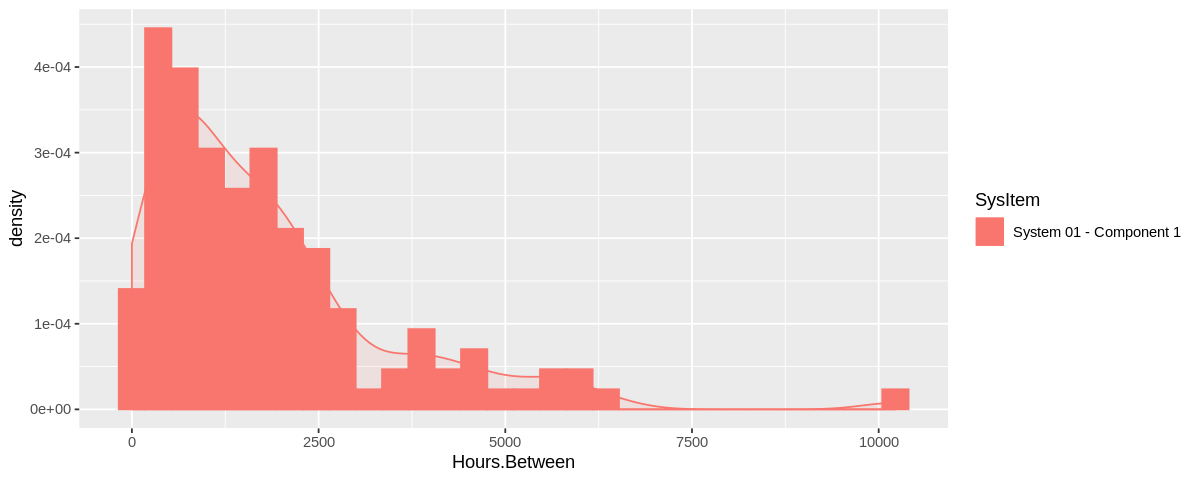

In [182]:
library(ggplot2)
library(repr)
options(repr.plot.width=10, repr.plot.height=4)

ggplot(df_tmp, aes(x=Hours.Between, fill=SysItem, colour=SysItem)) + 
    geom_histogram(aes(y=..density..)) +
    geom_density(alpha=.1) #+ #scale_x_log10() +
    #ggtitle("Percent of Trips by Distance to Airport") + xlab("Distance (km)") + ylab("Density")  +
    #theme(plot.title = element_text(hjust = 0.5))